In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import sunpy.map
from aiapy.calibrate.prep import register as aiaprep  # sunpy.instr.aia.aiaprep was moved to aiapy
from sunpy.net import Fido, attrs as a
from astropy import units as u

import glob
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# manual inputs
t = a.Time('2014-07-09T04:10:00', '2014-07-09T06:48:42')

folder = '/Users/delbe/OneDrive - FHNW/aia_304/20141204_181904_3800100083'
# folder_iris = "../../../../cr_obs3/20140418_123338_3820259153/Si IV 1400"
p1 = [2306,2460]  # x,y of p1 (begin of slit in AIA coordinates)
p2 = [2309,2263]  # x,y of p2 (end of slit in AIA coordinates)

In [ ]:
# search for aia sources
result = Fido.search(t, a.Instrument("aia"), a.Wavelength(304*u.angstrom), a.Sample(1*u.second))

In [ ]:
# download files, skip if already downloaded
# Fido.fetch(result, path=folder)

In [3]:
# get downloaded files
files = glob.glob(folder + '/*')

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,

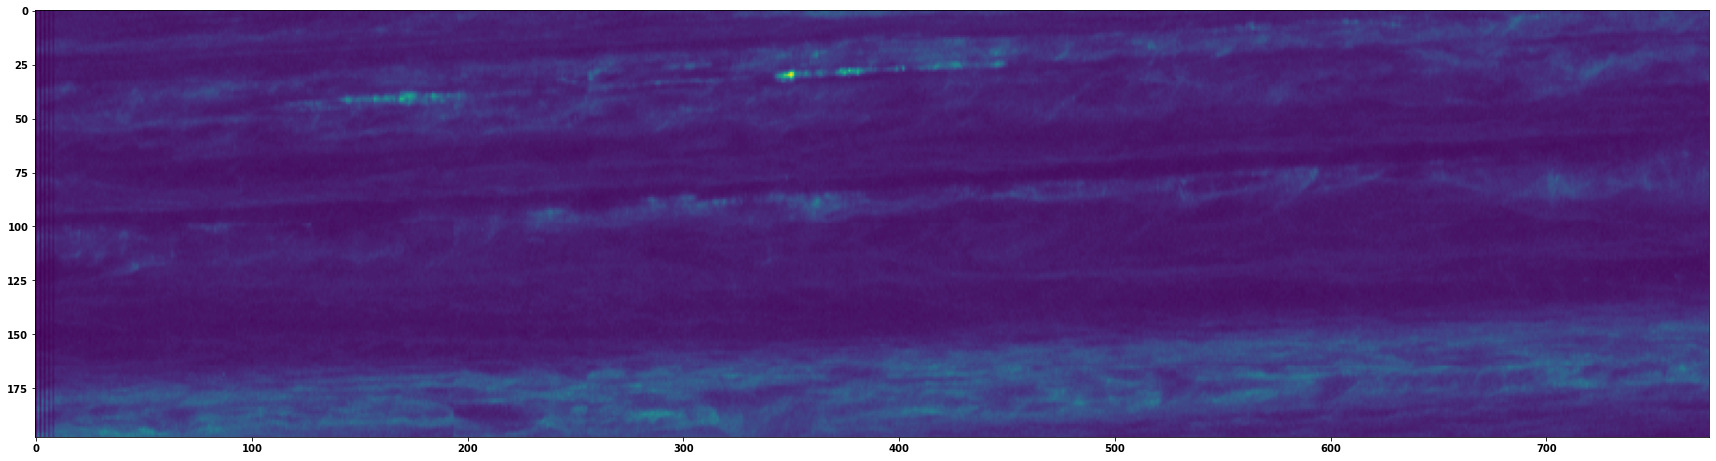

In [5]:
# This should be modified in such a way that it reads the input from the excel sheet and calculates all the images. 

gradient = (p2[1]-p1[1])/(p2[0]-p1[0])
origin = p1[1] - gradient * p1[0]

# x = np.linspace(p1[0], p2[0], 200)  # 200 = slit-size in pixels?
# y = (gradient*x + origin)
# coords = (np.column_stack((x.astype(int),y.astype(int))))

# alternative way to get coordinates - assuming slit is always (almost) vertical
y = np.arange(min(p1[1], p2[1]),max(p1[1], p2[1])+1)
x = (y - origin) / gradient
coords = (np.column_stack((x.round().astype(int),y.astype(int))))

final_image = []
list_dates = []
for i in range(0,len(files)-1):
# for i in range(0,100):
    
    if i%10 == 0:
        print(i, end=',')
    
    try:         
        aia1 = sunpy.map.Map(files[i])
    except: 
        continue
        
    aia = aiaprep(aia1)
    spilltet_date = aia.date.isot.split("T")
    
    zi = np.flipud(aia.data.T)[coords[:,1], coords[:,0]]
    
    if len(final_image) == 0: 
        final_image = zi 
    else:
        final_image = np.vstack([final_image, zi])

# nticks = 20 

# ax.xaxis.set_major_locator(MaxNLocator(nticks))
# ax.set_xticklabels(spilltet_date[::int(len(list_dates)/nticks)], rotation = 50, horizontalalignment="right")

# im = plt.imshow(final_image.transpose(),cmap = aia.cmap)

# plt.xlabel('Time[UT]')
# plt.ylabel('Position')
# plt.show()
np.save("data_aia.npy", final_image)
plt.figure(figsize=[30,10]) # on this image, we should see the downflows.
plt.imshow(final_image.transpose())

# Please adapt the axes for the correct annotation (y-solar coordinates and x-time)

In [8]:
data = np.load("data_aia.npy")

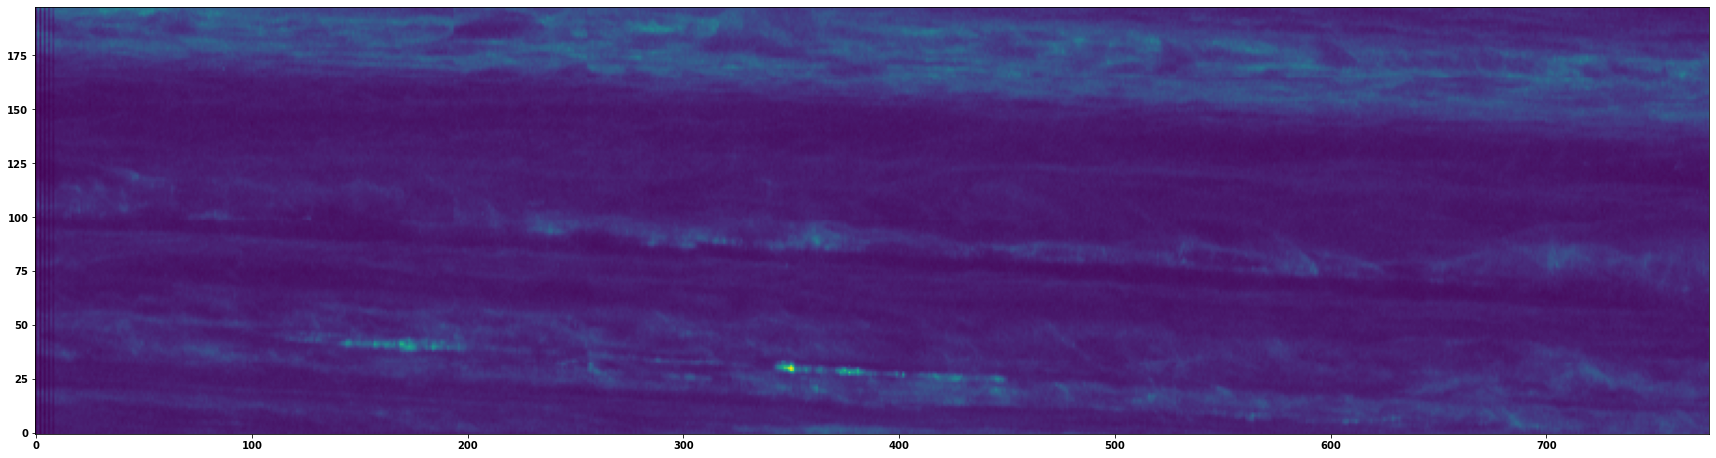

In [18]:
data = np.load("data_aia.npy")
plt.figure(figsize=[30,10])
plt.imshow(data.transpose(), origin = "lower" )

In [17]:
# plt.figure(figsize=(30,15))
# plt.imshow(np.log(final_image.transpose()))

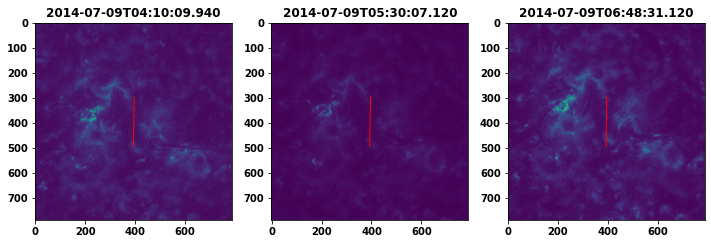

In [22]:
# draw AIA context around slit

x, y = (p1[0] + p2[0])//2, (p1[1] + p2[1])//2
dy = abs(p1[1] - p2[1]) * 2

plt.figure(figsize=(12,12))

aia = aiaprep(sunpy.map.Map(files[0]))
plt.subplot(1, 3, 1)
plt.title(aia.date.isot)
im = np.flipud(aia.data.T)[y-dy:y+dy, x-dy:x+dy]
plt.plot([p1[0]-x+dy, p2[0]-x+dy], [p1[1]-y+dy, p2[1]-y+dy], color="red", linewidth=1)
plt.imshow(im)
        
aia = aiaprep(sunpy.map.Map(files[len(files) // 2]))
plt.subplot(1, 3, 2)
plt.title(aia.date.isot)
im = np.flipud(aia.data.T)[y-dy:y+dy, x-dy:x+dy]
plt.plot([p1[0]-x+dy, p2[0]-x+dy], [p1[1]-y+dy, p2[1]-y+dy], color="red", linewidth=1)
plt.imshow(im)

aia = aiaprep(sunpy.map.Map(files[-1]))
plt.subplot(1, 3, 3)
plt.title(aia.date.isot)
im = np.flipud(aia.data.T)[y-dy:y+dy, x-dy:x+dy]
plt.plot([p1[0]-x+dy, p2[0]-x+dy], [p1[1]-y+dy, p2[1]-y+dy], color="red", linewidth=1)
plt.imshow(im)